## Exploratory Data Analysis

* The data set has 21,321 instances and 23 features (input variables), which include the Certificate of Deposit’s maturity term, times it got renewed, age of the cd, federal rate, rate spread, and some categorical grouping of the cd's indicators, etc.
* The predictor variable (“y”) states the outcome of the CD renewal — whether the respondent would renewal for a deposit 1 (“yes”) or 0 (“no”).
Let's start with loading all the third-party libraries (you can also make use of requirements.txt) that we are going to use and the data set itself

In [1]:
# Import Third party python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score
 

In [2]:
# Loading the data

data = pd.read_csv('C:/Users\Ancha Harika/Desktop/data/INT-1234 Data Scientist Applicant Assignment/Data Science Applicant Assignment - Mock Data.csv')

### Understanding Data

 Let’s drop the duplicates (if any) and then look at the data set shape, number, types of variables, and the overall distribution of the numerical variables. :

In [3]:
# Drop duplicates and print shape

data = data.drop_duplicates()
data.shape

(21321, 24)

In [4]:
# Data type information

data.dtypes

CDRenewal                 int64
CDNumber                 object
MaturingTerm              int64
MaturingTermGrouping     object
MaturingBalance         float64
TimeRenewed               int64
CDAge                     int64
BA_STATE                 object
CustomerTenure            int64
LifeStageGroupCat        object
LifeStageGroupSubcat     object
PsycleCodeDescrip        object
TRAN_COUNT                int64
TRAN_BALANCE            float64
AdditCDCount              int64
LOAN_COUNT                int64
LOAN_BALANCE            float64
POB_INT                   int64
MB_INT                    int64
IVR_INT                   int64
FF                      float64
CDAdvertisingSpend      float64
BankAdvertisingSpend    float64
RateSpread              float64
dtype: object

We have 24 variables (18 numeric and 6 object) and 21321 non-duplicate rows for each variable. There are indeed no missing values. Let’s convert all variables of the type “object” along with POB_INT,MB_INT,IVR_INT into categorical variables after checking our missing values so that they are stored properly:

Next, let us look at the first and last 10 rows of the data to see if they are consistent and if there are any issues:

In [5]:
data.head(10)

,CDRenewal,CDNumber,MaturingTerm,MaturingTermGrouping,MaturingBalance,TimeRenewed,CDAge,BA_STATE,CustomerTenure,LifeStageGroupCat,...,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,POB_INT,MB_INT,IVR_INT,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
0,0,MOCKACCT000000000002,10,7-15 months,50468.92,0,0,TX,0,Unassigned,...,0,0,0.0,0,0,0,0.66,0.0,0.0,1.09338
1,1,MOCKACCT000000000003,10,7-15 months,40000.00,0,0,TX,1,Younger Years,...,1,0,0.0,0,0,0,0.66,0.0,0.0,1.09338
2,1,MOCKACCT000000000004,18,16-24 months,31275.10,0,1,FL,3,Younger Years,...,1,0,0.0,0,0,0,0.66,0.0,0.0,1.49210
3,1,MOCKACCT000000000005,10,7-15 months,171594.32,0,0,TX,0,Mature Years,...,1,0,0.0,1,0,0,0.66,0.0,0.0,1.09338
4,1,MOCKACCT000000000006,18,16-24 months,50000.00,0,1,FL,2,Family Life,...,3,0,0.0,0,0,0,0.66,0.0,0.0,1.49210
5,0,MOCKACCT000000000007,10,7-15 months,239746.26,0,0,FL,3,Mature Years,...,0,0,0.0,1,0,0,0.60,0.0,0.0,1.19290
6,0,MOCKACCT000000000008,10,7-15 months,297772.86,0,0,FL,0,Unassigned,...,0,0,0.0,0,0,0,0.60,0.0,0.0,1.19290
7,0,MOCKACCT000000000009,10,7-15 months,239746.26,0,0,FL,3,Mature Years,...,1,0,0.0,1,0,0,0.60,0.0,0.0,1.19290
8,0,MOCKACCT000000000010,10,7-15 months,10093.78,0,0,TX,0,Mature Years,...,0,0,0.0,1,0,0,0.60,0.0,0.0,1.09338
9,0,MOCKACCT000000000011,10,7-15 months,10093.78,0,0,TX,0,Mature Years,...,1,0,0.0,0,0,0,0.60,0.0,0.0,1.09338


In [6]:
data.tail(10)

,CDRenewal,CDNumber,MaturingTerm,MaturingTermGrouping,MaturingBalance,TimeRenewed,CDAge,BA_STATE,CustomerTenure,LifeStageGroupCat,...,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,POB_INT,MB_INT,IVR_INT,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
21311,1,MOCKACCT000000021313,24,16-24 months,85616.72,1,0,TX,4,Mature Years,...,0,0,0.0,0,0,0,1.58,0.0,4591.08,1.787080
21312,1,MOCKACCT000000021314,24,16-24 months,85616.72,1,0,TX,4,Mature Years,...,0,0,0.0,0,0,0,1.58,0.0,4591.08,1.787080
21313,1,MOCKACCT000000021315,24,16-24 months,10905.82,1,0,TX,3,Mature Years,...,0,0,0.0,0,0,0,1.58,0.0,4591.08,1.787080
21314,1,MOCKACCT000000021316,24,16-24 months,10905.82,1,0,TX,3,Mature Years,...,0,0,0.0,0,0,0,1.58,0.0,4591.08,1.787080
21315,0,MOCKACCT000000021317,60,25+ months,52806.61,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225
21316,0,MOCKACCT000000021318,60,25+ months,52806.61,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225
21317,0,MOCKACCT000000021319,60,25+ months,52806.61,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225
21318,0,MOCKACCT000000021320,60,25+ months,52806.61,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225
21319,0,MOCKACCT000000021321,60,25+ months,52792.56,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225
21320,0,MOCKACCT000000021322,60,25+ months,52792.56,0,0,TX,2,Mature Years,...,2,0,0.0,0,0,0,1.58,0.0,4591.08,1.786225


### Identifying Missing Values

In [7]:
# Checking for missing values

data.isnull().sum(axis = 0)

CDRenewal                0
CDNumber                 0
MaturingTerm             0
MaturingTermGrouping    12
MaturingBalance          0
TimeRenewed              0
CDAge                    0
BA_STATE                 0
CustomerTenure           0
LifeStageGroupCat        0
LifeStageGroupSubcat     0
PsycleCodeDescrip        0
TRAN_COUNT               0
TRAN_BALANCE             0
AdditCDCount             0
LOAN_COUNT               0
LOAN_BALANCE             0
POB_INT                  0
MB_INT                   0
IVR_INT                  0
FF                       0
CDAdvertisingSpend       0
BankAdvertisingSpend     0
RateSpread               0
dtype: int64

In [8]:
data[data['MaturingTermGrouping'].isnull()]

,CDRenewal,CDNumber,MaturingTerm,MaturingTermGrouping,MaturingBalance,TimeRenewed,CDAge,BA_STATE,CustomerTenure,LifeStageGroupCat,...,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,POB_INT,MB_INT,IVR_INT,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
351,0,MOCKACCT000000000353,25,NaN,3485.50,4,9,FL,24,Younger Years,...,0,0,0.0,1,1,1,0.91,0.0,72735.27716,1.15282
1311,1,MOCKACCT000000001313,25,NaN,151000.96,0,2,FL,3,Family Life,...,1,0,0.0,0,0,0,1.12,0.0,61131.50126,1.15272
1940,1,MOCKACCT000000001942,25,NaN,22129.04,0,2,FL,6,Family Life,...,1,0,0.0,1,1,0,1.16,0.0,35867.78733,1.29192
6914,1,MOCKACCT000000006916,25,NaN,12477.33,1,0,FL,3,Mature Years,...,10,0,0.0,0,0,0,2.20,0.0,56019.88000,2.23012
11234,0,MOCKACCT000000011236,25,NaN,26249.21,2,0,TX,20,Family Life,...,1,0,0.0,1,0,1,2.44,0.0,63.07000,2.08218
11404,0,MOCKACCT000000011406,25,NaN,12742.26,2,0,FL,3,Mature Years,...,10,0,0.0,0,0,0,2.44,0.0,4470.70000,2.22830
12140,1,MOCKACCT000000012142,25,NaN,69212.12,1,0,TX,2,Mature Years,...,1,0,0.0,0,0,0,2.39,0.0,9818.69000,2.38268
12144,1,MOCKACCT000000012146,25,NaN,69212.12,1,0,TX,2,Mature Years,...,1,0,0.0,0,0,0,2.39,0.0,9818.69000,2.38268
15393,0,MOCKACCT000000015395,25,NaN,62313.02,1,0,TX,2,Mature Years,...,4,0,0.0,1,0,0,2.40,0.0,8884.98000,2.38268
15394,0,MOCKACCT000000015396,25,NaN,62313.02,1,0,TX,2,Mature Years,...,4,0,0.0,1,0,0,2.40,0.0,8884.98000,2.38268


* We could see that there are 12 missing values occurring in a single column "MaturingTermGrouping" only when the related  "Maturing Term" column's value is 25. 
* MaturingTermGrouping has different groups for a Maturing Term of less than 25 and greater than 25.

Since all of the missing values can easily be labeled, let us impute a new group =25, instead of dropping them

In [9]:
data = data.fillna('=25')
data[data['MaturingTerm'] == 25]

,CDRenewal,CDNumber,MaturingTerm,MaturingTermGrouping,MaturingBalance,TimeRenewed,CDAge,BA_STATE,CustomerTenure,LifeStageGroupCat,...,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,POB_INT,MB_INT,IVR_INT,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
351,0,MOCKACCT000000000353,25,=25,3485.50,4,9,FL,24,Younger Years,...,0,0,0.0,1,1,1,0.91,0.0,72735.27716,1.15282
1311,1,MOCKACCT000000001313,25,=25,151000.96,0,2,FL,3,Family Life,...,1,0,0.0,0,0,0,1.12,0.0,61131.50126,1.15272
1940,1,MOCKACCT000000001942,25,=25,22129.04,0,2,FL,6,Family Life,...,1,0,0.0,1,1,0,1.16,0.0,35867.78733,1.29192
6914,1,MOCKACCT000000006916,25,=25,12477.33,1,0,FL,3,Mature Years,...,10,0,0.0,0,0,0,2.20,0.0,56019.88000,2.23012
11234,0,MOCKACCT000000011236,25,=25,26249.21,2,0,TX,20,Family Life,...,1,0,0.0,1,0,1,2.44,0.0,63.07000,2.08218
11404,0,MOCKACCT000000011406,25,=25,12742.26,2,0,FL,3,Mature Years,...,10,0,0.0,0,0,0,2.44,0.0,4470.70000,2.22830
12140,1,MOCKACCT000000012142,25,=25,69212.12,1,0,TX,2,Mature Years,...,1,0,0.0,0,0,0,2.39,0.0,9818.69000,2.38268
12144,1,MOCKACCT000000012146,25,=25,69212.12,1,0,TX,2,Mature Years,...,1,0,0.0,0,0,0,2.39,0.0,9818.69000,2.38268
15393,0,MOCKACCT000000015395,25,=25,62313.02,1,0,TX,2,Mature Years,...,4,0,0.0,1,0,0,2.40,0.0,8884.98000,2.38268
15394,0,MOCKACCT000000015396,25,=25,62313.02,1,0,TX,2,Mature Years,...,4,0,0.0,1,0,0,2.40,0.0,8884.98000,2.38268


In [10]:
# Converting the object data type columns to category

columns = ['MaturingTermGrouping','LifeStageGroupCat','LifeStageGroupSubcat','BA_STATE','POB_INT','MB_INT','IVR_INT','PsycleCodeDescrip']
data[columns] = data[columns].apply(lambda x: x.astype('category'))

 The data set looks clean, and there are no obvious inconsistencies. 
 Let us go deeper and look at each and every categorical and numerical variables separately.

### Categorical Variables

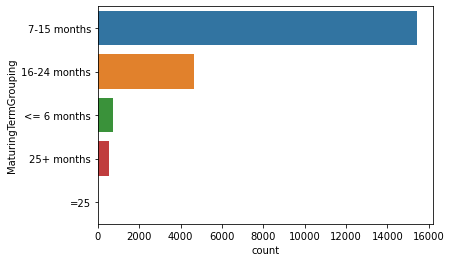

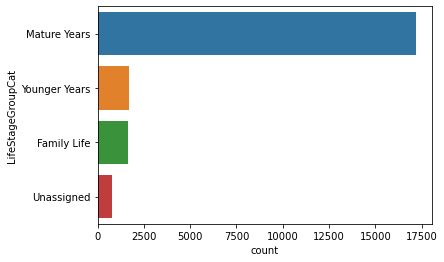

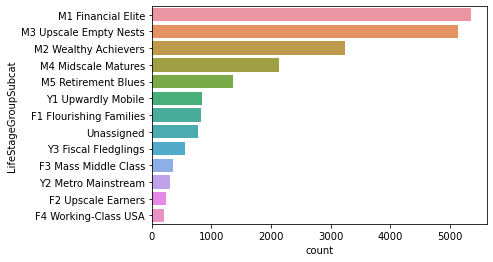

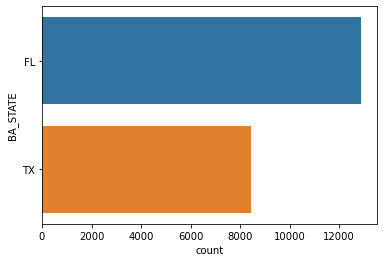

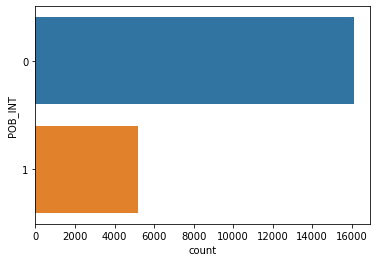

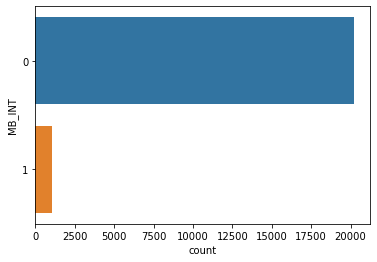

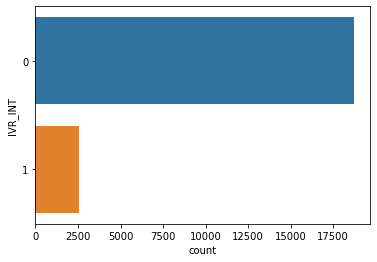

In [11]:
# Bar plots of categorical features

for feature in columns[0:len(columns)-1]:
    sns.countplot(y=feature, data=data, order = data[feature].value_counts().index)
    plt.show()

* From the above visualizations, we can say which categories in each feature has a high number of CD.
* But it is not easy to evaluate the exact proportions of the categories from the charts, so let us look at the inner groups of the categorical variables along with proportions:

Next, let us look at the relationship between 'CDRenewal' and 'MaturingTermGrouping'

In [12]:
# Creating pivot tabel for CDRenewal chance by MaturingTermGrouping

pd.pivot_table(data, values='CDRenewal', index=['MaturingTermGrouping']).sort_values(by='CDRenewal', ascending=False)

,CDRenewal
MaturingTermGrouping,
<= 6 months,0.750339
7-15 months,0.649176
16-24 months,0.612320
=25,0.416667
25+ months,0.227006


* From the above table it is evident that, as the maturing term is less then the chance of CD renewal is high.
* Vice-Versa higher the Maturing Term, the chance of CD renewal is low.

Next, Let us look at 'LifeStageGroupCat','LifeStageGroupSubcat' ,'PsycleCodeDescrip'

In [13]:
# Creating a pivot table for 'LifeStageGroupCat','LifeStageGroupSubcat' ,'PsycleCodeDescrip'

table = pd.pivot_table(data, values='CDRenewal', index=['LifeStageGroupCat','LifeStageGroupSubcat' ,'PsycleCodeDescrip','BA_STATE'],margins =True,margins_name = 'all')
with pd.option_context('display.max_rows', None, 'display.max_columns', table.shape[1]):
    print(table)

                                                                               CDRenewal
LifeStageGroupCat LifeStageGroupSubcat    PsycleCodeDescrip          BA_STATE           
Family Life       F1 Flourishing Families Big Spenders               FL         0.628571
                                                                     TX         0.573529
                                          Family Funding             FL         0.125000
                                                                     TX         0.586667
                                          Leveraged Life             FL         0.700000
                                                                     TX         0.622951
                                          School Daze                FL         0.722772
                                                                     TX         0.620690
                  F2 Upscale Earners      Fiscally Fit Families      FL         0.636364
                     

* From the above table, we can see that there is a very good tree like structure between 'LifeStageGroupCat','LifeStageGroupSubcat' ,'PsycleCodeDescrip' features.
'PsycleCodeDescrip' is unique to'LifeStageGroupSubCat' which in return is unique to 'LifeStageGroupCat'
* We can also see that the unassigned has very less CD renewal chance.
* Family Funding in Florida has a very less renewal chance compared to all other groups.

Next, let us look at the relationship between POB_INT, MB_INT, IVR_INT, and CDRenewal

In [14]:
# creating pivot tabel for CDRenewal,State and POB_INT

pd.pivot_table(data=data,values='CDRenewal', index=['POB_INT','BA_STATE'],margins =True,margins_name = 'all')

CDRenewal
POB_INT BA_STATE           
0       FL         0.649361
        TX         0.651166
1       FL         0.596185
        TX         0.570272
all                0.634398

In [15]:
# creating pivot tabel for CDRenewal and MB_INT

pd.pivot_table(data=data,values='CDRenewal', index=['MB_INT'],margins =True,margins_name = 'all')

,CDRenewal
MB_INT,
0,0.638870
1,0.550510
all,0.634398


In [16]:
# creating pivot tabel for CDRenewal and IVR_INT

pd.pivot_table(data=data,values='CDRenewal', index=['IVR_INT'],margins =True,margins_name = 'all')

,CDRenewal
IVR_INT,
0,0.635719
1,0.624757
all,0.634398


In the above three pivot tables, we can see the renewal percentage for both 0 and 1 categories is almost the same which, makes these features less important for model development.
Hence, we can drop them before model development.

The BA_State variable shows a similar pattern in both the states which makes it less important.

### Numerical Data Analysis

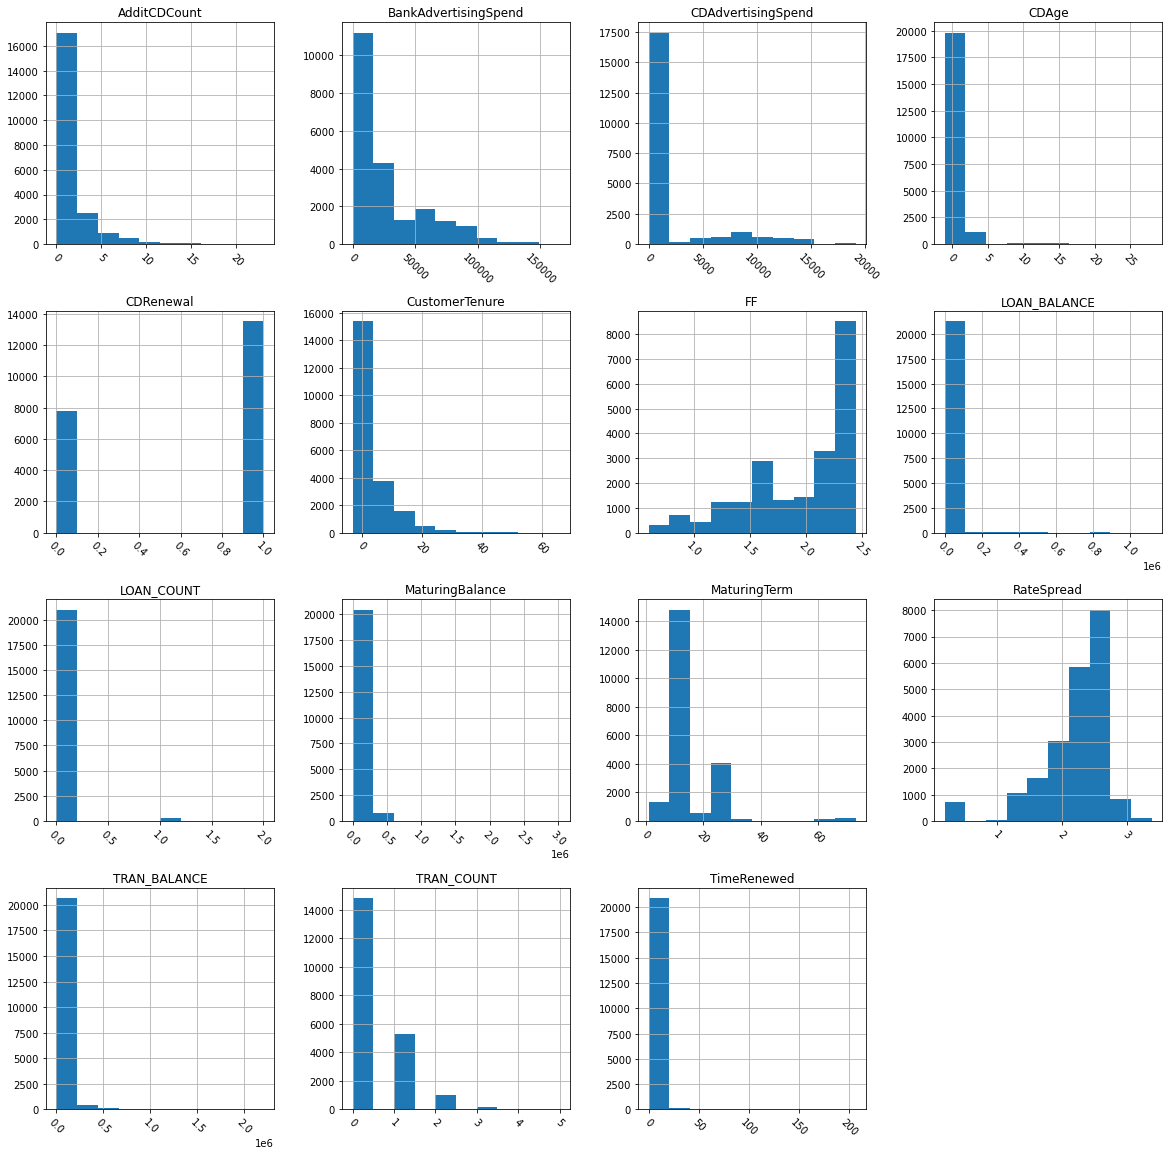

In [17]:
# Histogram grid
# Y-axis - Number of CDs

data.hist(figsize=(20,20), xrot=-45)
plt.ylabel("Number of CDs")
plt.show()

* From the above histograms, we could see that as the Rate spread and FF increase, the number of CDs is increasing (though rate spread dropped a little at the end again).
* On the other hand, an increase in  Tran_Balance, CDAge, and TimeRenewed causes a decrease in the number of CDs
* These are the strong features to develop a model
* At the other end we could see that the target variable CD Renewal is unbalanced with more number of renewals

In [18]:
# Summary of the numerical data

data.describe()

,CDRenewal,MaturingTerm,MaturingBalance,TimeRenewed,CDAge,CustomerTenure,TRAN_COUNT,TRAN_BALANCE,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
count,21321.000000,21321.000000,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,2.132100e+04,21321.000000,21321.000000,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000
mean,0.634398,15.054500,1.012347e+05,2.852493,0.413161,3.877726,0.370245,2.611355e+04,1.562497,0.016228,1.037183e+03,1.960639,1689.821008,27480.470732,2.190626
std,0.481610,8.802259,1.199271e+05,15.225628,1.633397,4.992697,0.623917,9.017920e+04,2.334131,0.131805,2.069931e+04,0.478384,3815.344448,28469.369893,0.542025
min,0.000000,1.000000,-7.179100e+02,0.000000,-1.000000,-3.000000,0.000000,-3.432000e+01,0.000000,0.000000,0.000000e+00,0.600000,0.000000,0.000000,0.187800
25%,0.000000,12.000000,2.596634e+04,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.580000,0.000000,8049.210000,1.982580
50%,1.000000,12.000000,6.795087e+04,1.000000,0.000000,2.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,2.130000,0.000000,14575.620000,2.280480
75%,1.000000,14.000000,1.249168e+05,2.000000,0.000000,4.000000,1.000000,1.329960e+03,2.000000,0.000000,0.000000e+00,2.400000,0.000000,40006.845160,2.573300
max,1.000000,73.000000,3.019773e+06,207.000000,28.000000,66.000000,5.000000,2.202121e+06,23.000000,2.000000,1.116759e+06,2.440000,19094.190000,165550.272900,3.383575


* From the above data description, we could see that the maturing balance, CDAge, Customer Tenure are having negative values.
* We know that CD age and Customer Tenure cannot be negative.
* Assuming Maturing Balance cannot be negative and CD Transfers are not applicable.

As there are a very limited number of records, we can consider all of them as outliers and remove them

In [19]:
# Removing Outliers

data = data.drop(data[data['CDAge']<0].index,axis=0)
data = data.drop(data[data['CustomerTenure']<0].index,axis=0)
data = data.drop(data[data['MaturingBalance']<0].index,axis=0)

In [20]:
# Creating a Pivot table for 'CDRenewal','TimeRenewed' and,'MaturingTerm'

tabel = pd.pivot_table(data=data,values='CDRenewal', index=['TimeRenewed','MaturingTerm'])
tabel.tail()

CDRenewal
TimeRenewed MaturingTerm           
204         1                   1.0
205         1                   1.0
            3                   1.0
206         3                   1.0
207         3                   1.0

* From the above pivot table, we could see that CDs which are renewed for more than 24 times have maturity term grouping <=6.
* There are  renewals for 12 and 13 maturing term in the above category but they account to a very small part

Next, let us look at the relationship between CDAdvertisingSpend and BankAdvertisingSpend

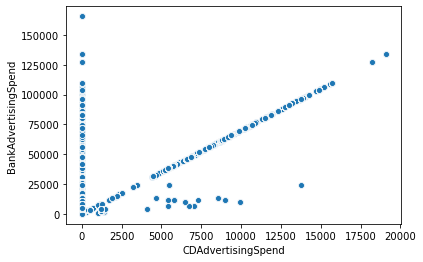

In [21]:
# Scatterplot between CDAdvertisingSpend and BankAdvertisingSpend

sns.scatterplot(x="CDAdvertisingSpend", y="BankAdvertisingSpend", data=data)

* From the above plot we could see that there is a strong one-way linear relationship between CD Advertising Spend and Bank Advertising Spend.
* As the CD Advertising Spend increases Bank Advertising Spend increases, but, not the other way.

In [22]:
data[data['CDAge']>data['CustomerTenure']].head()

,CDRenewal,CDNumber,MaturingTerm,MaturingTermGrouping,MaturingBalance,TimeRenewed,CDAge,BA_STATE,CustomerTenure,LifeStageGroupCat,...,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,POB_INT,MB_INT,IVR_INT,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
87,1,MOCKACCT000000000089,1,<= 6 months,98600.0,84,7,TX,6,Younger Years,...,0,0,0.0,0,0,0,0.66,0.000000,0.00000,0.197667
200,1,MOCKACCT000000000202,1,<= 6 months,98600.0,85,7,TX,6,Younger Years,...,0,0,0.0,0,0,0,0.66,0.000000,40073.28416,0.197667
259,1,MOCKACCT000000000261,36,25+ months,20000.0,3,12,FL,0,Younger Years,...,4,0,0.0,1,0,0,0.65,8852.068355,61964.47849,2.184058
315,1,MOCKACCT000000000317,1,<= 6 months,98600.0,86,7,TX,6,Younger Years,...,0,0,0.0,0,0,0,0.91,0.000000,16308.34888,0.197667
448,1,MOCKACCT000000000450,1,<= 6 months,98600.0,87,7,TX,6,Younger Years,...,0,0,0.0,0,0,0,0.91,0.000000,24227.93510,0.196500


* Assuming that customer tenure should be either equal or less than CDAge as a person cannot open a CD account without being associated with the bank
* Expecting them to be outliers. Hence removing them

In [23]:
# drop the above mentioned outlier

data = data.drop(data[data['CDAge']>data['CustomerTenure']].index,axis=0)

"TimeRenewed" column looks like a derived column. Multiplying the "CDAge" with the number of renewals per year
should give us the "TimeRenewed" for a CD, but "MaturingTerm" might not be constant for all the renewals of a CD
(as per the data dictionary), let us see if the assumption holds or not.


In [24]:
# caluclate timerenowed

output = pd.DataFrame(np.where((data['TimeRenewed']== (12/data['MaturingTerm'])* data['CDAge']),0,1))
print(output[output[0]==1].count())
output[output[0]==0].count()

0    13956
dtype: int64


0    7323
dtype: int64

7323 records don't match since the number of records is very high, the assumption that it is a derived column doesn't hold and it strengthens the key point that only the "MaturingTerm" of the last renewal was given in the data set.

Correlation plot for identifying statistical analysis between numerical variables

In [25]:
data.corr(method='pearson').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,CDRenewal,MaturingTerm,MaturingBalance,TimeRenewed,CDAge,CustomerTenure,TRAN_COUNT,TRAN_BALANCE,AdditCDCount,LOAN_COUNT,LOAN_BALANCE,FF,CDAdvertisingSpend,BankAdvertisingSpend,RateSpread
CDRenewal,1.0,-0.16,-0.011,0.092,0.087,0.054,-0.022,0.0072,0.01,-0.0047,-0.0056,-0.1,0.0087,0.035,-0.11
MaturingTerm,-0.16,1.0,0.073,-0.19,-0.033,-0.091,-0.025,-0.0049,0.12,-0.011,-0.0034,0.057,-0.056,0.019,0.31
MaturingBalance,-0.011,0.073,1.0,-0.083,-0.044,-0.028,0.022,0.14,-0.17,-0.033,0.0003,0.017,-0.0068,-0.006,0.075
TimeRenewed,0.092,-0.19,-0.083,1.0,0.4,0.32,0.065,-0.021,-0.066,0.038,0.02,-0.051,-0.057,0.01,-0.42
CDAge,0.087,-0.033,-0.044,0.4,1.0,0.27,0.033,0.016,-0.037,0.06,0.02,-0.34,0.083,0.26,-0.37
CustomerTenure,0.054,-0.091,-0.028,0.32,0.27,1.0,0.32,0.13,-0.038,0.14,0.067,0.00049,-0.061,-0.003,-0.26
TRAN_COUNT,-0.022,-0.025,0.022,0.065,0.033,0.32,1.0,0.49,-0.0066,0.22,0.14,0.015,-0.016,-0.0048,-0.061
TRAN_BALANCE,0.0072,-0.0049,0.14,-0.021,0.016,0.13,0.49,1.0,-0.0033,0.08,0.023,-0.024,0.017,0.012,-0.00071
AdditCDCount,0.01,0.12,-0.17,-0.066,-0.037,-0.038,-0.0066,-0.0033,1.0,0.0069,-0.022,0.0064,-0.0064,-0.0049,0.074
LOAN_COUNT,-0.0047,-0.011,-0.033,0.038,0.06,0.14,0.22,0.08,0.0069,1.0,0.5,-0.004,-0.011,-0.0071,-0.044


From the above correlation heatmap, we could see that many variables are not correlated.
There is high linearity between Rate Spread and FF, CDADvertisingSpend and Bank Advertising Spend (which we had already seen in the scatter plots)

In [26]:
# Checking for data imbalance

data['CDRenewal'].value_counts()

1    13488
0     7791
Name: CDRenewal, dtype: int64

The data has little imbalance as the percentage ones are greater than the percentage of zeros.

* Based on the above analysis we could say that Maturing Term, TimeRenewed, RateSpread, FF BankAdvertingSpend, and  CDAdvertisingSpend are important variables

* POB_INT, MB_INT_WR_INT, BA_STATE are not important to model


## Feature Creation

* Generally if there is a high amount in the tran_balance compared to the maturity balance people would not want like to withdraw their CD.
* There would be a high chance of renewal in such cases
* Let us see if that assumption holds in the Feature Selection

In [27]:
data['Balance_diff'] = data['TRAN_BALANCE']-data['MaturingBalance']

## Feature Selection 

* Based on the above EDA we can drop POB_INT,MB_INT_WR_INT,BA_STATE,CDNumber(unique Identifier) , LifeStageGroupSubcat, LifeStageGroupCat and select the remaining variables

In [28]:
data = data.drop(['POB_INT','MB_INT','IVR_INT','BA_STATE','CDNumber','LifeStageGroupSubcat','LifeStageGroupCat','MaturingBalance','TRAN_BALANCE'],axis=1)

* Next, we shall divide the data into Dependent(X) and Independent variables(y) and perform label encoding for features.
* Then after we can divide the data into Test and Train

In [29]:
y = data['CDRenewal']
X = data.drop(['CDRenewal'], axis=1)

### Label Encoding

* Models will try to convert string to floats before modeling.
* Hence we shall convert them into labeled categories

In [30]:
le = preprocessing.LabelEncoder()
for column_name in X.select_dtypes(['category']).columns:
    X[column_name] = le.fit_transform(X[column_name])

* To understand the model's performances we should divide it into multiple combinations of test and train set.
* Let us first divide them in the ratio's of 80:20, 70,30 and 60:40
* Parallelly we can build a random forest classifier and try to find the important features for model prediction using feature importance  

### Feature Importance Calculation

In [31]:
# Dividing the data into test and train

X_train20, X_test20, y_train20, y_test20 = train_test_split(X, y, test_size=0.20, random_state=4)
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.30, random_state=4)

clf = RandomForestClassifier(n_estimators=1000,max_features ='auto',min_samples_leaf = 1,min_samples_split=2, random_state=42, n_jobs=-1)

# Train the classifier

clf.fit(X_train20, y_train20)
clf.fit(X_train30, y_train30)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [32]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03

sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train20, y_train20)
sfm.fit(X_train30, y_train30)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=42),
                threshold=0.03)

In [33]:
# Printing the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

MaturingTerm
TimeRenewed
CDAge
CustomerTenure
PsycleCodeDescrip
AdditCDCount
FF
BankAdvertisingSpend
RateSpread
Balance_diff


In [34]:
# Transforming the Train and Test sets

X_important_train20 = sfm.transform(X_train20)
X_important_test20 = sfm.transform(X_test20)
X_important_train30 = sfm.transform(X_train30)
X_important_test30 = sfm.transform(X_test30)
X_transformed = sfm.transform(X)

* The important features to predict the CD Renewal by the model are the same as to our key feature identification in the EDA: MaturingTerm, TimeRenewed, PsycleCodeDescrip, BankAdvertisingSpend, RateSpread, and Balance_diff.


## Model Development

* After Trying out few models like Logistic regression with regularization, Decision trees, and Support vector machines. (code is given in section 7)
* Random Forest Classifier turned to have a good result based on Accuracy, Confusion matrix, and AUC.

### 80-20 Train & Test Set

In [35]:
# Create a new random forest classifier for the most important features

clf_important = RandomForestClassifier(n_estimators=1000,max_features ='auto',min_samples_leaf = 1,min_samples_split=2, random_state=42, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features

clf_important.fit(X_important_train20, y_train20)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [36]:
# Apply Classifier To The Test Data

y_pred20 = clf_important.predict(X_important_test20)

In [37]:
y_pred20_proba = pd.DataFrame(clf_important.predict_proba(X_important_test20))

In [38]:
print("Accuracy:",accuracy_score(y_test20, y_pred20))

Accuracy: 0.925516917293233


In [39]:
# Confusion Matrix
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test20, y_pred20)

print(pd.DataFrame(confusion_matrix))

      0     1
0  1340   216
1   101  2599


In [40]:
# Classification Report

print(classification_report(y_test20, y_pred20))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1556
           1       0.92      0.96      0.94      2700

    accuracy                           0.93      4256
   macro avg       0.93      0.91      0.92      4256
weighted avg       0.93      0.93      0.92      4256



In [41]:
# Area under the curve

fpr, tpr, thresholds = roc_curve(y_test20, y_pred20)
auc(fpr, tpr)

0.9118875559363991

Text(0, 0.5, 'TPR')

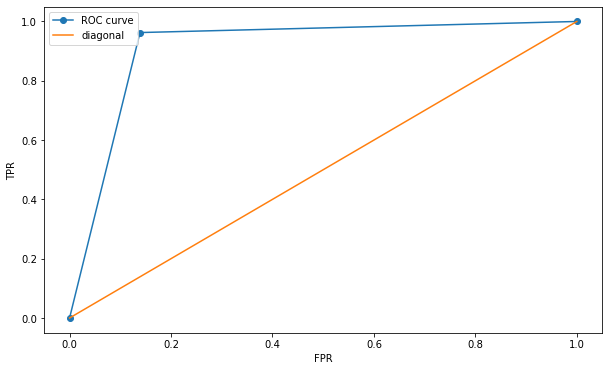

In [42]:
# Plotting ROC curve

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

### 70-30 Train & Test Set

In [43]:
# Create a new random forest classifier for the most important features

clf_important = RandomForestClassifier(n_estimators=1000,max_features ='auto',min_samples_leaf = 1,min_samples_split=2, random_state=42, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features

clf_important.fit(X_important_train30, y_train30)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [44]:
# Apply Classifier To The Test Data

y_pred30 = clf_important.predict(X_important_test30)

In [45]:
y_pred30_proba = pd.DataFrame(clf_important.predict_proba(X_important_test30))

In [46]:
print("Accuracy:",accuracy_score(y_test30, y_pred30))

Accuracy: 0.9136904761904762


In [47]:
# Confusion Matrix 

from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test30, y_pred30)

pd.DataFrame(confusion_matrix)

,0,1
0,1934,379
1,172,3899


In [48]:
# Classification Report

print(classification_report(y_test30, y_pred30))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2313
           1       0.91      0.96      0.93      4071

    accuracy                           0.91      6384
   macro avg       0.91      0.90      0.90      6384
weighted avg       0.91      0.91      0.91      6384



In [49]:
# Area under the curve

fpr, tpr, thresholds = roc_curve(y_test30, y_pred30)
auc(fpr, tpr)

0.8969467375613343

Text(0, 0.5, 'TPR')

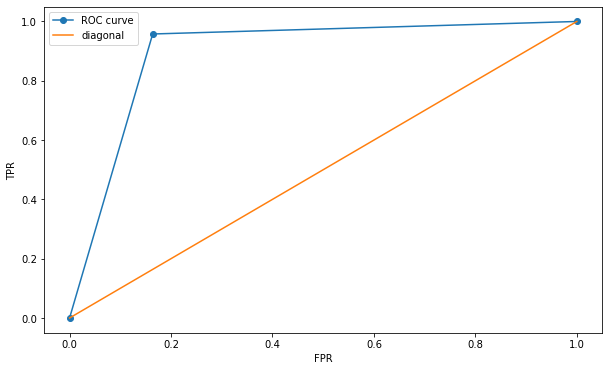

In [50]:
# Plotting ROC

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

* Based on the initial model performance (which was highly overfitting), hyperparameter tuning steps such as increasing n_estimators, decreasing number of min_sample_leafs, min sample splits, and selecting max_features with options such as: auto, sqrt are used to decrease overfitting up to a certain extent.
* Accuracy, Precision, Recall, and AUC have the values greater than 90% which is a good sign.
* Based on the confusion matrix, the model was able to predict less false positives. 
* Hence the next step would be to do K fold cross-validation to reduce overfitting.

## Validation

accuracy_score 0.9149436090225563
[[1308  221]
 [ 141 2586]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1529
           1       0.92      0.95      0.93      2727

    accuracy                           0.91      4256
   macro avg       0.91      0.90      0.91      4256
weighted avg       0.91      0.91      0.91      4256



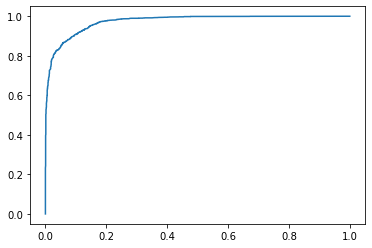

auc 0.9736887357800528
accuracy_score 0.9170582706766918
[[1304  233]
 [ 120 2599]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1537
           1       0.92      0.96      0.94      2719

    accuracy                           0.92      4256
   macro avg       0.92      0.90      0.91      4256
weighted avg       0.92      0.92      0.92      4256



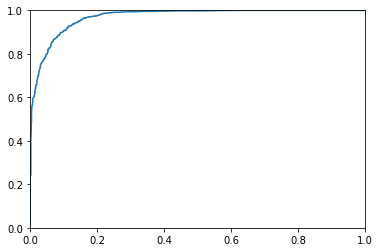

auc 0.9699863822451851
accuracy_score 0.918703007518797
[[1339  261]
 [  85 2571]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1600
           1       0.91      0.97      0.94      2656

    accuracy                           0.92      4256
   macro avg       0.92      0.90      0.91      4256
weighted avg       0.92      0.92      0.92      4256



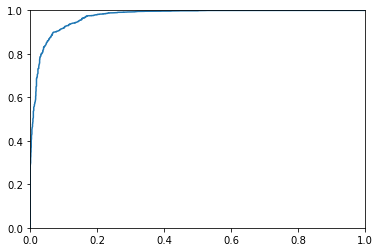

auc 0.9723810476280121
accuracy_score 0.9184680451127819
[[1318  240]
 [ 107 2591]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1558
           1       0.92      0.96      0.94      2698

    accuracy                           0.92      4256
   macro avg       0.92      0.90      0.91      4256
weighted avg       0.92      0.92      0.92      4256



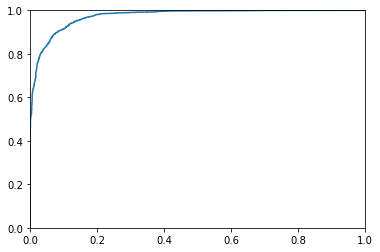

auc 0.9738252839787185
accuracy_score 0.909283196239718
[[1302  265]
 [ 121 2567]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1567
           1       0.91      0.95      0.93      2688

    accuracy                           0.91      4255
   macro avg       0.91      0.89      0.90      4255
weighted avg       0.91      0.91      0.91      4255



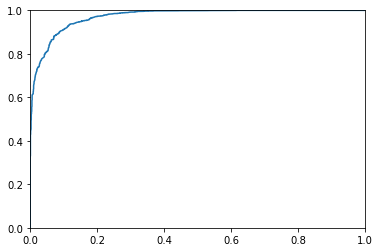

auc 0.9717410286945026


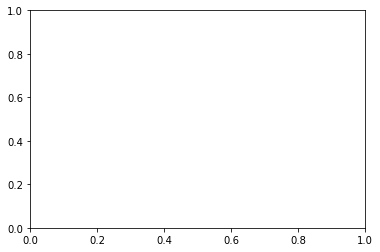

In [51]:
# 5 fold cross validation

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=10000)

accuracy = []
auc_array = []

X_variables = pd.DataFrame(X_transformed)
response = y
for train_index, val_index in kf.split(X_variables, response):
    
    # Split data
    
    X_train, X_val = X_variables.iloc[train_index], X_variables.iloc[val_index]
    y_train, y_val = response.iloc[train_index], response.iloc[val_index]
    
    # Instantiate model
    
    model_k = clf_important.fit(X_train, y_train)
    
    # Predict Model
    
    predictions_kfold = model_k.predict(X_val)
    
    # Print Accuracy score
    
    print("accuracy_score", accuracy_score(y_val, predictions_kfold))
    
    # Print Confusion matrix and Classification report
    # Importing accuracy_score
    from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score
    
    confusion_matrix = confusion_matrix(y_val, predictions_kfold)
    print(confusion_matrix)
    print(classification_report(y_val, predictions_kfold))
    accuracy.append(accuracy_score(y_val, predictions_kfold))
    predict_prob = model_k.predict_proba(X_val)
    
    # Plot Area under the curve
    
    fpr, tpr, _ = roc_curve(y_val, predict_prob[:, 1])
    plt.plot(fpr, tpr)
    plt.show()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    k = auc(fpr, tpr)
    print("auc", k)
    auc_array.append(k)
    

In [52]:
mean_accuracy = np.mean(accuracy)
mean_accuracy

0.9156912257141089

In [53]:
mean_auc_array = np.mean(auc_array)
mean_auc_array

0.9723244956652943

* After 5 fold cross-validation, the model has good results when compared to initial results.
* It has a mean accuracy of 91.5 and AUC of 97.2

## Other Models

Previously we have seen one way linear relation between 'BankAdvertisingSpend' and 'CDAdvertisingSpend'.We can expect some strong relation between percentage of 'AdvertisingSpend'(BankAdvertisingSpend/CDAdvertisingSpend) and 'CDRenewal'. 

In [54]:
Perc_of_Advertising = pd.DataFrame(data['BankAdvertisingSpend']/data['CDAdvertisingSpend'])
Perc_of_Advertising = Perc_of_Advertising.replace(np.inf, np.nan)
Perc_of_Advertising = np.where(Perc_of_Advertising.isnull(), 0, Perc_of_Advertising)

Our expectation turned out to be wrong.Since, 'CDAdvertisingSpend' is zero in many cases 

### Model 1: Logistic Regression

In [55]:
# Train test split

X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.30, random_state=4)

In [56]:
# Instantiate model

log = LogisticRegression(penalty='l2' , random_state=42)
log.fit(X_train30, y_train30)

LogisticRegression(random_state=42)

In [57]:
# Apply The Full Featured Classifier To The Test Data
y_pred = log.predict(X_test30)

print("Accuracy:",accuracy_score(y_test30, y_pred))

Accuracy: 0.6538220551378446


In [58]:
# Confusion Matrix
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test30, y_pred)
pd.DataFrame(confusion_matrix)

,0,1
0,297,2016
1,194,3877


In [59]:
fpr, tpr, thresholds = roc_curve(y_test30, y_pred)
auc(fpr, tpr)

0.5403752651142608

Text(0, 0.5, 'TPR')

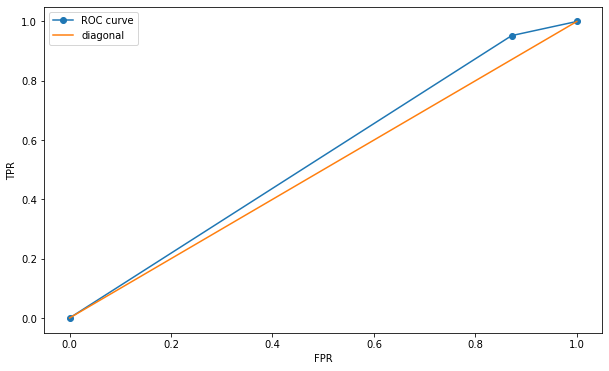

In [60]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Model 2 - SVM Classifier

In [61]:
# Instantiate model

model = SVC()
model.fit(X_train30, y_train30)

SVC()

In [62]:
# Apply The Full Featured Classifier To The Test Data
y_pred = log.predict(X_test30)

print("Accuracy:",accuracy_score(y_test30, y_pred))

Accuracy: 0.6538220551378446


In [63]:
# Confusuion matrix
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test30, y_pred)
pd.DataFrame(confusion_matrix)

,0,1
0,297,2016
1,194,3877


In [64]:
fpr, tpr, thresholds = roc_curve(y_test30, y_pred)
auc(fpr, tpr)

0.5403752651142608

Text(0, 0.5, 'TPR')

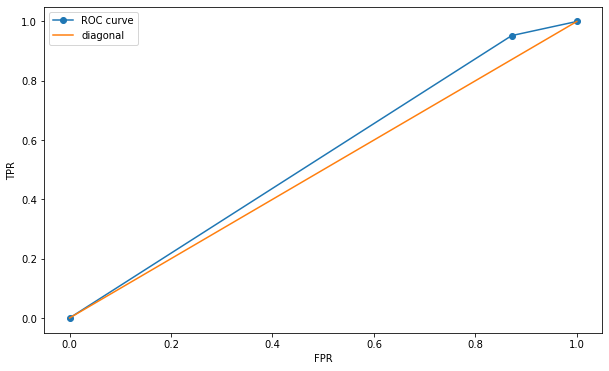

In [65]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
#for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::1]):
   # plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Model 3 - Balanced Dataset Model

In our EDA we came across the data imbalance, we can sub-sample the data to an equal number of zeros and ones to increase the model's accuracy and AUC

In [66]:
# Balancing the  Data

zeros = data[data['CDRenewal']==0]
ones = data[data['CDRenewal']==1]
ones = ones.sample(n=len(zeros),random_state=0)
train_zeros = zeros.sample(frac=0.8, random_state=0)
test_zeros = zeros.drop(train_zeros.index)
train_zeros
train_ones = ones.sample(frac=0.8, random_state=0)
test_ones = ones.drop(train_ones.index)
train_set = pd.concat([train_zeros, train_ones], axis=0)
test_set = pd.concat([test_zeros, test_ones], axis=0)

In [67]:
#Dividing the data into Train and Test Split

train_y = train_set[['CDRenewal']]
train_x = train_set.drop('CDRenewal', axis='columns')
test_y = test_set[['CDRenewal']]
test_x = test_set.drop('CDRenewal', axis='columns')


In [68]:
# Label Encoding the data

le = preprocessing.LabelEncoder()
for column_name in train_x.select_dtypes(['category']).columns:
    train_x[column_name] = le.fit_transform(train_x[column_name])
for column_name in test_x.select_dtypes(['category']).columns:
    test_x[column_name] = le.fit_transform(test_x[column_name])

In [69]:
# Instantiate model
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

clf = RandomForestClassifier(n_estimators=1000,max_features ='auto',min_samples_leaf = 1,min_samples_split=2, random_state=42, n_jobs=-1)

# Train the classifier
clf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [70]:
# Apply The Full Featured Classifier To The Test Data

y_pred = clf.predict(test_x)
y_train_pred = clf.predict(train_x)

In [71]:
print("Accuracy:",accuracy_score(test_y, y_pred))

Accuracy: 0.889602053915276


In [72]:
# Confusion Matrix
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(test_y, y_pred)
pd.DataFrame(confusion_matrix)

,0,1
0,1384,174
1,170,1388


In [73]:
# Area Under the curve

fpr, tpr, thresholds = roc_curve(test_y, y_pred)
auc(fpr, tpr)

0.8896020539152759

Text(0, 0.5, 'TPR')

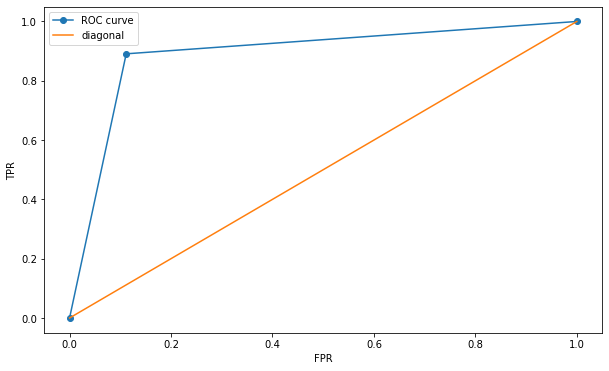

In [74]:
# ROC Curve

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

## Future Improvement

If additional information such as Date, Age, and Zipcode, etc for the CDs is available it would give us an opportunity to link it to an external data like census, household mean income in a given geographical area as there is a strong relationship between economic status and people's income. It would also enable us to predict accurately by understanding the Renewal patterns by season, by months, and by area.